In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fitNonlinLeastSqVarArgs(data,ansatzFun,v0,*funArgs):
    from scipy.optimize import leastsq

    t = data[:,0];  y = data[:,1]
    fp   = ansatzFun
    ferr = lambda v, t, y: (fp(v,t,*funArgs)-y)
    v, success = leastsq(ferr, v0, args=(t,y), maxfev=20000)

    return v

In [3]:
def fit_sigmoid(v,t,*args):
    return 1/(np.exp(-v[1]*(t-v[0]))+1)*(v[3]-v[2])+v[2]

def fit_step(v,t,*args):
    return np.heaviside(t-v[0],0.0)*(v[2]-v[1])+v[1]

def fit_ramp(v,t,*args):
    slope = (v[3]-v[2])/(v[1]-v[0])
    f = slope*(t-v[0])+v[2]
    f[t<v[0]] = v[2]
    f[t>v[1]] = v[3]
    return f

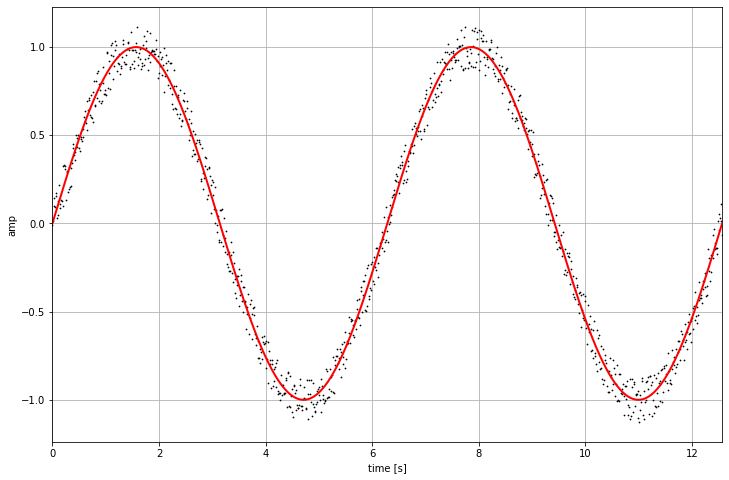

In [4]:
fitfun = lambda v, t, *args:v[0]*np.sin(v[1]*t+v[2])+v[3]

nt = 1000
data_ = np.zeros([nt,2],float)
data_[:,0] = np.linspace(0,4*np.pi,nt)
data_[:,1] = np.sin(data_[:,0])+0.25*(np.random.rand(nt)-0.5)


funArgs = (1,0)
v0 = [1.0,1.0,0.0,0.0]
v = fitNonlinLeastSqVarArgs(data_,fitfun,v0,*funArgs)


data_fit = np.zeros([nt,2],float)
data_fit[:,0] = data_[:,0]
data_fit[:,1] = fitfun(v,data_[:,0],*funArgs)

fig = plt.figure(figsize=(12,8))
plt.plot(data_[:,0],data_[:,1],'.k',markersize=1.5)
plt.plot(data_fit[:,0],data_fit[:,1],'-r',lw=2)

plt.xlabel('time [s]')
plt.ylabel('amp')
plt.xlim([data_[0,0],data_[-1,0]])
plt.grid()
# plt.savefig('ls_fit_harmonic.png',dpi=200,format='png')
plt.show()
# plt.close()

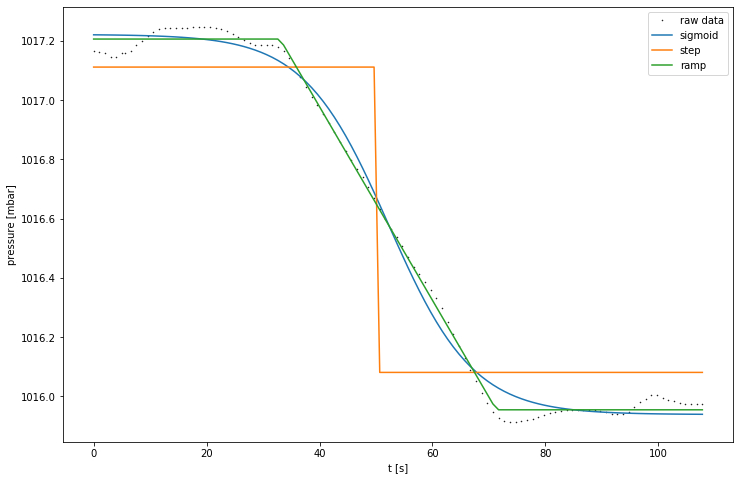

In [5]:
fn = 'pressure_step.csv'

data = np.loadtxt(fn,delimiter=',',skiprows=1)

nt = data.shape[0]

funArgs = (1,0)
v0_sigmoid = [50,-1,1020.0,1010.0]
v0_step = [50.0,1020.0,1010.0]
v0_ramp = [40,70,1020.0,1010.0]

# v0 = [1.0,1.0,0.0,0.0]
v1 = fitNonlinLeastSqVarArgs(data,fit_sigmoid,v0_sigmoid,*funArgs)
v2 = fitNonlinLeastSqVarArgs(data,fit_step,v0_step,*funArgs)
v3 = fitNonlinLeastSqVarArgs(data,fit_ramp,v0_ramp,*funArgs)

data_fit1 = np.zeros([nt,2],float)
data_fit1[:,0] = data[:,0]
data_fit1[:,1] = fit_sigmoid(v1,data[:,0],*funArgs)

data_fit2 = np.zeros([nt,2],float)
data_fit2[:,0] = data[:,0]
data_fit2[:,1] = fit_step(v2,data[:,0],*funArgs)

data_fit3 = np.zeros([nt,2],float)
data_fit3[:,0] = data[:,0]
data_fit3[:,1] = fit_ramp(v3,data[:,0],*funArgs)

fig = plt.figure(figsize=(12,8))
plt.plot(data[:,0],data[:,1],'.k',markersize=1.0,label='raw data')
plt.plot(data_fit1[:,0],data_fit1[:,1],label='sigmoid')
plt.plot(data_fit2[:,0],data_fit2[:,1],label='step')
plt.plot(data_fit3[:,0],data_fit3[:,1],label='ramp')
plt.xlabel('t [s]')
plt.ylabel('pressure [mbar]')
plt.legend()
plt.show()
# plt.savefig('ls_fit_ramp.png',dpi=200,format='png')
# plt.close()